In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

df=pd.read_csv('data_science_salaries.csv')
df


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
3298,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


In [20]:
grouped = df.groupby('Job Title')[['Salary in USD']].count()
grouped.sort_values('Salary in USD', ascending=False, inplace=True)
popular_titles = grouped[grouped['Salary in USD'] > 80].index

df = df[df['Job Title'].isin(popular_titles)]
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3289,Machine Learning Engineer,Full-Time,Senior,Expert,40000,Euro,Croatia,45618,Croatia,Small,2020
3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [21]:
grouped[grouped['Salary in USD'] > 80]

,Salary in USD
Job Title,
Data Engineer,702
Data Scientist,635
Data Analyst,459
Machine Learning Engineer,300
Analytics Engineer,132
Research Scientist,104
Data Architect,84


In [22]:
numerical = df.select_dtypes(include=np.number)
categorical = df.select_dtypes(include=object)

ord_encoded = categorical[['Experience Level','Company Size']]
ord_encoded = ord_encoded.replace({
    'Experience Level': {'Executive': 4, 'Senior': 3, 'Mid': 2, 'Entry': 1},
    'Company Size': {'Small': 1, 'Large': 3, 'Medium': 2},
})

hot_encoded = categorical[['Employment Type','Job Title']]
hot_encoded = pd.get_dummies(hot_encoded, dtype=int)

cat_encoded = pd.concat([ord_encoded,hot_encoded], axis=1)
all_data = pd.concat([numerical, cat_encoded], axis=1)
all_data

,Salary,Salary in USD,Year,Experience Level,Company Size,Employment Type_Contract,Employment Type_Freelance,Employment Type_Full-Time,Employment Type_Part-Time,Job Title_Analytics Engineer,Job Title_Data Analyst,Job Title_Data Architect,Job Title_Data Engineer,Job Title_Data Scientist,Job Title_Machine Learning Engineer,Job Title_Research Scientist
0,210000,210000,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
1,165000,165000,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
2,185900,185900,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
3,129300,129300,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
4,140000,140000,2023,3,2,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,40000,45618,2020,3,1,0,0,1,0,0,0,0,0,0,1,0
3291,160000,119059,2021,2,2,0,0,1,0,0,0,0,0,1,0,0
3293,24000,28369,2021,2,3,0,0,1,0,0,0,0,1,0,0,0
3295,412000,412000,2020,3,3,0,0,1,0,0,0,0,0,1,0,0


,y_test,y_pred,residual
535,167850,168053.420082,-203.420082
263,110000,130549.420082,-20549.420082
2275,75000,104693.420082,-29693.420082
2614,113000,115189.420082,-2189.420082
1401,139000,130549.420082,8450.579918
...,...,...,...
1945,122700,168053.420082,-45353.420082
1999,100706,157685.420082,-56979.420082
363,222000,168053.420082,53946.579918
2440,57872,114805.420082,-56933.420082


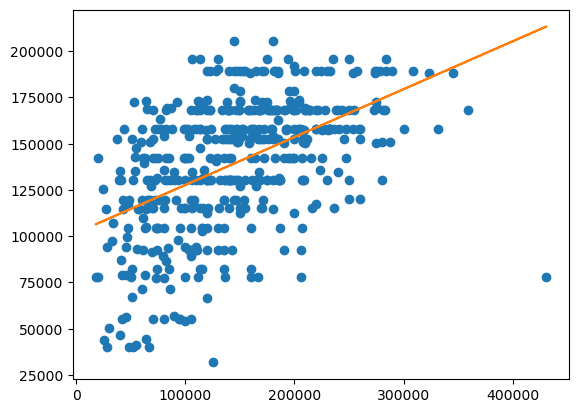

In [23]:
X = all_data.drop('Salary in USD', axis=1)
y = all_data['Salary in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))

lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

res_df

In [24]:
# Model Validation

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2


MSE: 3440054014.015623
RMSE: 58651.97365831454
MAE: 45802.65116500991
R2: 0.23291165530109015
Adj_R2: 0.2083254904068944
R2_train: 0.2862640673432746
R2_test: 0.23291165530109015


In [25]:
y_train_pred = model.predict(X_train_scaled)
train_residuals = np.array(y_train - y_train_pred)
res_df = pd.DataFrame({'y_test':y_train, 'y_pred':y_train_pred, 'residual':train_residuals})
res_df

,y_test,y_pred,residual
2271,185900,152693.420082,33206.579918
2144,35610,110069.420082,-74459.420082
715,80000,130549.420082,-50549.420082
1386,199000,168053.420082,30946.579918
1084,281000,168053.420082,112946.579918
...,...,...,...
2237,120000,114805.420082,5194.579918
1476,151800,150347.533675,1452.466325
1521,154000,92661.420082,61338.579918
1751,370000,168053.420082,201946.579918


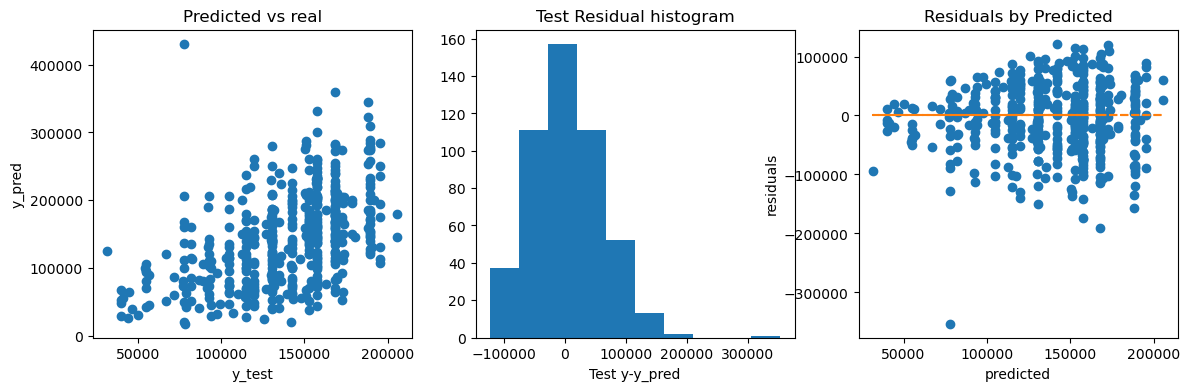

In [26]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

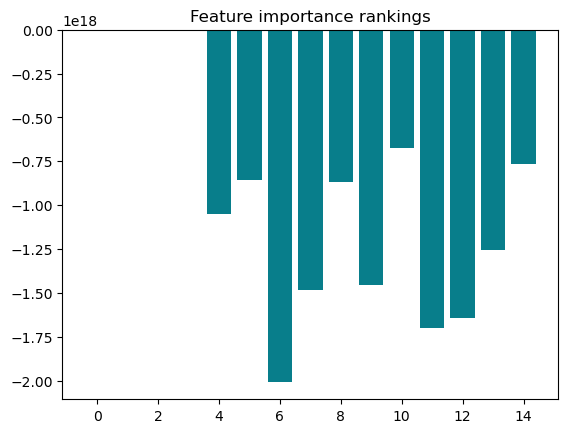

,Variable,Importance,name
2,2,2.578236e+04,Year
1,1,1.045661e+04,Salary in USD
3,3,1.797362e+03,Experience Level
0,0,1.239664e+02,Salary
10,10,-6.752521e+17,Job Title_Data Analyst
14,14,-7.680333e+17,Job Title_Machine Learning Engineer
5,5,-8.572666e+17,Employment Type_Contract
8,8,-8.677760e+17,Employment Type_Part-Time
4,4,-1.049661e+18,Company Size
13,13,-1.254813e+18,Job Title_Data Scientist


In [30]:
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    #'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
    'Importance': model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),)
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=feature_importances['Variable'].iloc[:], height=feature_importances['Importance'].iloc[:], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='horizontal')
plt.show()

important_features = feature_importances.sort_values('Importance', ascending=False).head(15)
features = all_data.columns
important_features['name'] = features[important_features['Variable']]
important_features

MSE: 17484307.94550914
RMSE: 4181.42415278684
MAE: 2085.154515937503
R2: 0.9936911053873484
Adj_R2: 0.9931534155055883
R2_train: 0.9948585370346678
R2_test: 0.9936911053873484


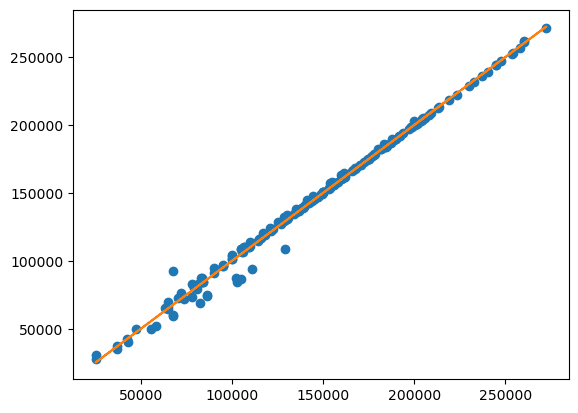

In [32]:
"""
=======================================================================================
|                                                                                     |
|  Rerun the model after removing the outliers and compare the results using the R2.  |
|                                                                                     |
=======================================================================================

"""

from scipy import stats

without_outliers = all_data[(np.abs(stats.zscore(all_data)) < 2).all(axis=1)]

X = without_outliers.drop('Salary in USD', axis=1)
y = without_outliers['Salary in USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
lm = LinearRegression() # fit_intercept = True
model = lm.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(np.array(X_test))
y_pred = model.predict(X_test_scaled)
residuals = np.array(y_test - y_pred)
res_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':residuals})
plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b)

R2=r2_score(y_test,y_pred)
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print("MSE:", mse(y_test,y_pred))                # Mean Squared Error
print("RMSE:", np.sqrt(mse(y_test,y_pred)))      # Root Mean Square Error
print("MAE:", mae(y_test,y_pred))                # Mean Absolute Error
print("R2:", R2)                                 # Coefficient of Determination (R2)
print("Adj_R2:", Adj_R2)                         # Adjusted R2
print("R2_train:", R2_train)                     # R2 Train
print("R2_test:", R2_test)                       # R2 Test = R2

In [33]:
without_outliers

,Salary,Salary in USD,Year,Experience Level,Company Size,Employment Type_Contract,Employment Type_Freelance,Employment Type_Full-Time,Employment Type_Part-Time,Job Title_Analytics Engineer,Job Title_Data Analyst,Job Title_Data Architect,Job Title_Data Engineer,Job Title_Data Scientist,Job Title_Machine Learning Engineer,Job Title_Research Scientist
0,210000,210000,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
1,165000,165000,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
2,185900,185900,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
3,129300,129300,2023,3,2,0,0,1,0,0,0,0,1,0,0,0
4,140000,140000,2023,3,2,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,185100,185100,2022,3,2,0,0,1,0,0,0,0,0,1,0,0
2987,104890,104890,2022,3,2,0,0,1,0,0,0,0,0,1,0,0
3003,88000,67597,2022,2,2,0,0,1,0,0,0,0,0,1,0,0
3016,100000,100000,2022,3,2,0,0,1,0,0,0,0,0,1,0,0


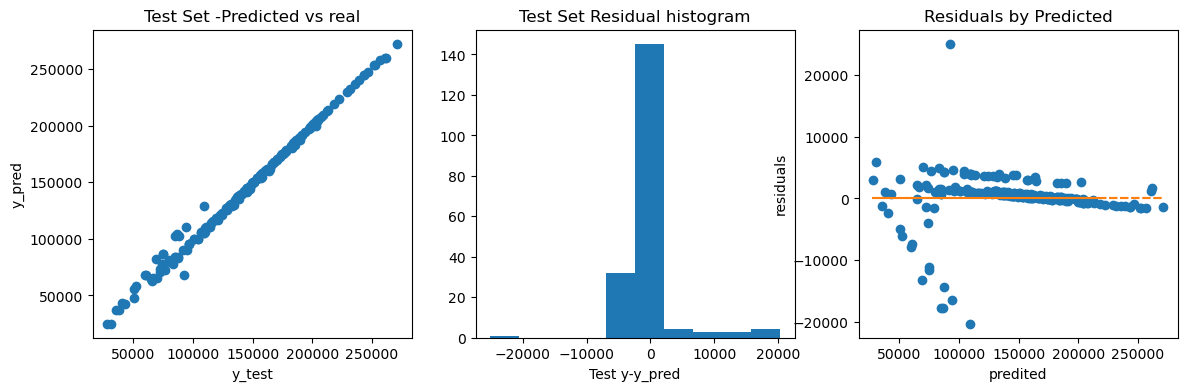

In [34]:
# y_pred vs y scatterplot
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Residual histogram: check normality of distribution
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity Check
ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

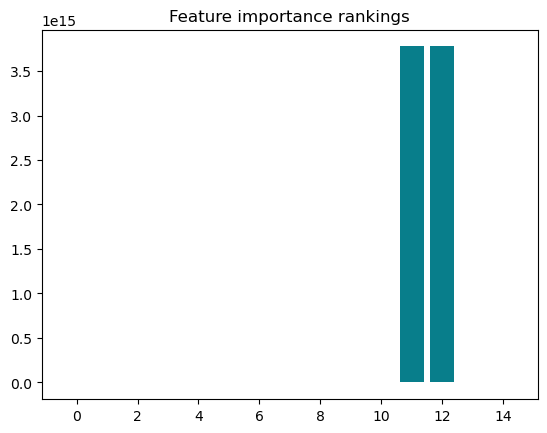

,Variable,Importance,name
12,12,3.776826e+15,Job Title_Data Engineer
11,11,3.776826e+15,Job Title_Data Architect
0,0,5.450615e+04,Salary
4,4,0.000000e+00,Company Size
5,5,0.000000e+00,Employment Type_Contract
6,6,0.000000e+00,Employment Type_Freelance
7,7,0.000000e+00,Employment Type_Full-Time
8,8,0.000000e+00,Employment Type_Part-Time
9,9,0.000000e+00,Job Title_Analytics Engineer
10,10,0.000000e+00,Job Title_Data Analyst


In [35]:
feature_importances = pd.DataFrame(data={
    'Variable': pd.DataFrame(X_train_scaled).columns,
    #'Importance': abs(model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),))
    'Importance': model.coef_.reshape(len(pd.DataFrame(X_train_scaled).columns),)
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.bar(x=feature_importances['Variable'].iloc[:], height=feature_importances['Importance'].iloc[:], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='horizontal')
plt.show()

important_features = feature_importances.sort_values('Importance', ascending=False).head(15)
features = all_data.columns
important_features['name'] = features[important_features['Variable']]
important_features